In [1]:
# import the required libraries
import os
#i use it for iterators
import itertools
import numpy as np
#computing the elapse time
import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
#for linear discriminant
from sklearn import linear_model
import pandas as pd
#i give some warning during the code i put this packge for that.
import warnings
warnings.filterwarnings("ignore")

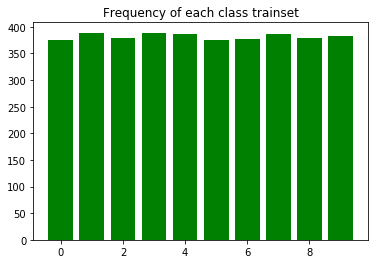

In [2]:
class_name=[0,1,2,3,4,5,6,7,8,9]
class_frequency=[376,389,380,389 ,387 ,376,377,387,380,382]
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(class_name,class_frequency,color='green')
#plt.grid(True)
#plt.legend('number of K')
plt.title("Frequency of each class trainset")
plt.show()

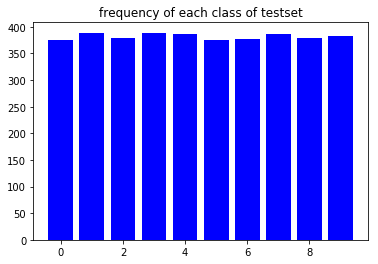

In [3]:
class_name=[0,1,2,3,4,5,6,7,8,9]
class_frequency_test=[178, 182,177,183,181,182,181,179,174,180]   
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(class_name,class_frequency,color='blue')
#plt.grid(True)
#plt.legend('number of K')
plt.title("frequency of each class of testset")
plt.show()

In [4]:
np.random.seed(seed=300)

# got the input of trainset and testset from the file 
trainset = np.loadtxt(open( 'optdigits.tra'), delimiter=",")
testset =np.loadtxt(open('optdigits.tes'),  delimiter=",")


In [5]:
#we slide the training set and label of that from trainset and put in some matrices

df_x_train=trainset[:,0:63]
df_x_test=testset[:,0:63]
df_y_train=trainset[:,64]
df_y_test=testset[:,64]



In [6]:
# i use this function  from this forum https://stackoverflow.com/questions/40246277/how-to-change-the-ticks-in-a-confusion-matrix
def Confusion_Matrix(cm, classes,
                          normalize=False,
                          
                          cmap=plt.cm.binary,title='confusion matrix'):
  
    plt.figure()
    plt.imshow(cm, cmap=cmap, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print(title)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('y_predicted')
    plt.ylabel('y_train')
   


accuracy of validation: 0.98956
 high accuracy in KNN: 1


 ##########################elapse time of process for trainset##################################
n_neighbors: 1,elaps time of process in training set  0.01151s.

confusion matrix of trainset for KNN 
[[376   0   0   0   0   0   0   0   0   0]
 [  0 389   0   0   0   0   0   0   0   0]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 389   0   0   0   0   0   0]
 [  0   0   0   0 387   0   0   0   0   0]
 [  0   0   0   0   0 376   0   0   0   0]
 [  0   0   0   0   0   0 377   0   0   0]
 [  0   0   0   0   0   0   0 387   0   0]
 [  0   0   0   0   0   0   0   0 380   0]
 [  0   0   0   0   0   0   0   0   0 382]]

 ##########################elapse time of process for testset##################################
Test accuracy 0.97997

KNN with :elapse time for testset0.56551 s.

confusion matrix of testset for KNN
[[178   0   0   0   0   0   0   0   0   0]
 [  0 181   0   0   0   0   0   0   1   0]
 [  0   2 175   0   0  

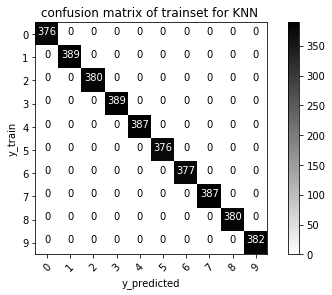

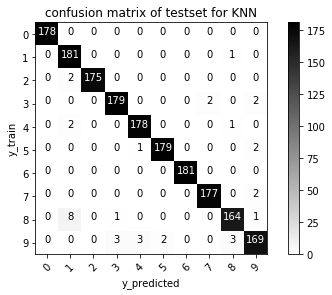

In [7]:
#i use sciket learn train test split funmction with 10 percent to validation 90 to training set
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(df_x_train, df_y_train, test_size=0.1)

k_test= np.arange(1,20,1)
class_label = ['c0','c1','c2','c3','c4','c55','c6','c7','c8','c9']

val_scores_knn = []



best_knn = -1
h_knn = -1
for i in k_test:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    #find the accuarcy of validation set with score
    val_acc_knn = knn.score(x_validation,y_validation ) 
    val_scores_knn.append(val_acc_knn)
    if val_acc_knn > h_knn:
        
        best_knn = knn
        h_knn = val_acc_knn

#find best k with highets score 
best_k = k_test[val_scores_knn.index(max(val_scores_knn))]



print("accuracy of validation: {:.5f}".format(best_knn.score(x_validation, y_validation)))


print (" high accuracy in KNN: {}\n".format(best_k))
# compute knn train elapse time
start_train = time.time()



print('\n ##########################elapse time of process for trainset##################################')

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(df_x_train, df_y_train)
#function for elapse time
finish_train=time.time()
print("n_neighbors: {},elaps time of process in training set  {:.5f}s.\n".format(best_k, finish_train - start_train))

y_pred_train_knn = knn.predict(df_x_train)
Confusion_Matrix(confusion_matrix(df_y_train, y_pred_train_knn), classes=class_name, title="confusion matrix of trainset for KNN ")
plt.figure(1)



#calcualting the elapse time for test set
start_test = time.time()
print('\n ##########################elapse time of process for testset##################################')
y_pred_test_knn = knn.predict(df_x_test)
finish_test = time.time()
print("Test accuracy {:.5f}\n".format(knn.score(df_x_test, df_y_test)))
print("KNN with :elapse time for testset{:.5f} s.\n".format( finish_test - start_test))


# plot test set confusion matrix

Confusion_Matrix(confusion_matrix(df_y_test, y_pred_test_knn), classes=class_name, title="confusion matrix of testset for KNN")
#plt.figure(2)
print("The process finish.")
plt.show(2)

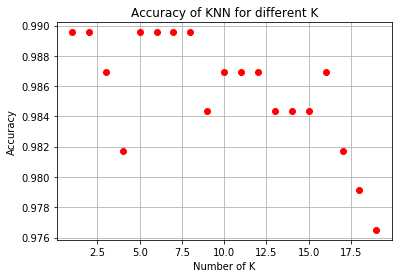

In [8]:
import matplotlib.pyplot as plt
#show the performancde of KNN in accuaracy for each K
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_test,val_scores_knn,'ro')
plt.grid(True)

plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.title("Accuracy of KNN for different K")
plt.show()

In [9]:
#find the best and worst K in KNN 
max_accuarcy=val_scores_knn.index(max(val_scores_knn))+1
min_accuaracy=val_scores_knn.index(min(val_scores_knn))+1
print("best accuarcy of k for KNN: {} .\n".format(max_accuarcy))
print("worst accuarcy of k for KNN: {} .\n".format(min_accuaracy))

best accuarcy of k for KNN: 1 .

worst accuarcy of k for KNN: 19 .



best a: 0.5

accuracy of validation: 0.955614


Computing linear classifier training time...


########################## elapse time of linear disfriminant function in training set:#########################
alpha: 0.5 .

 elapse time 0.03776 s.

confusion matrix of linear discriminant for trainset
[[371   0   1   0   2   1   1   0   0   0]
 [  0 334  16   1   2   2   2   4  20   8]
 [  0   0 376   1   0   0   1   0   1   1]
 [  0   0   4 373   0   5   0   1   2   4]
 [  0   0   0   0 374   0   3   0   4   6]
 [  0   0   2   1   0 369   0   0   0   4]
 [  0   1   1   0   2   1 372   0   0   0]
 [  0   0   1   1   0   0   0 385   0   0]
 [  1   5  17   1   7   2   3   0 344   0]
 [  1   4   5   4   8   2   0   3   4 351]]


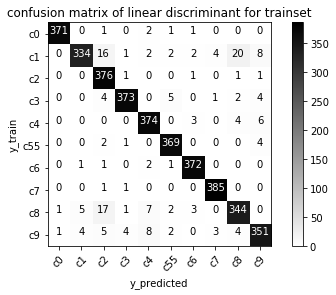

elaspse time for linear discriminant in test set...

alpha: 0.5, elapse time 0.0015 s.

test accuracy (linear classifier): 0.9293

confusion matrix of linear discriminant for testset
[[174   0   0   0   1   3   0   0   0   0]
 [  0 140  17   0   1   1   2   0   9  12]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   8 168   0   3   0   1   1   2]
 [  0   1   0   0 177   0   0   1   2   0]
 [  0   0   1   0   0 179   1   0   0   1]
 [  0   1   0   0   2   0 177   0   1   0]
 [  0   0   0   0   1   7   0 165   1   5]
 [  0   5   6   1   0   6   2   0 148   6]
 [  0   0   2   2   3   3   0   0   5 165]]


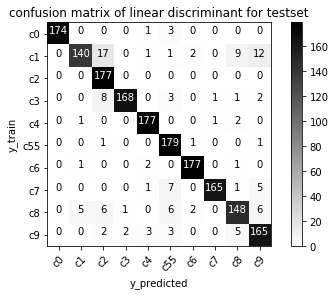

In [10]:
#this part of code is prepared for linear discriminant 


lin_reg = [0.0005, 0.005, 0.05, 0.5, 5, 50]

# an empty list to store validation accuracies
val_scores_sgd = []

# compute linear classifier accuracy for each regularization strength
alpha=-1
h_SGD_classifier = -1
sgd_classifier_acc = -1

for reg in lin_reg:
    sgdclassifier = linear_model.SGDClassifier(alpha=reg)
    sgdclassifier.fit(x_train, y_train)
    sgd_score = sgdclassifier.score(x_validation, y_validation) # accuracy for validation set
    val_scores_sgd.append(sgd_score)
    if sgd_score > sgd_classifier_acc:
        h_SGD_classifier = sgdclassifier
        sgd_classifier_acc = sgd_score




#finding best alpha
# predictinf the validation accuaracy
y_pred_val_sgd = h_SGD_classifier.predict(x_validation)

best_regularization_p =lin_reg[val_scores_sgd.index(max(val_scores_sgd))]
print ("best a: {}\n".format(best_regularization_p))
print("accuracy of validation: {:.6f}\n".format(h_SGD_classifier.score(x_validation, y_validation)))
print('\nComputing linear classifier training time...\n')
print('\n########################## elapse time of linear disfriminant function in training set:#########################')
start_train_li = time.time()
sgdclassifier = linear_model.SGDClassifier(alpha=best_regularization_p)
sgdclassifier.fit(df_x_train, df_y_train)
finsh_train_li=time.time()
print("alpha: {} .\n".format(best_regularization_p))
print(" elapse time {:.5f} s.\n".format(finsh_train_li - start_train_li))

#confusion matrix of trainset
y_predicted_train = sgdclassifier.predict(df_x_train)
 
Confusion_Matrix(confusion_matrix(df_y_train, y_predicted_train), classes=class_label,title="confusion matrix of linear discriminant for trainset")
plt.show()

# compute linear classifier test time
start = time.time()
print("elaspse time for linear discriminant in test set...\n")
y_pred_test_sgd = sgdclassifier.predict(df_x_test)
print("alpha: {}, elapse time {:.4f} s.\n".format(best_regularization_p, time.time() - start))
print("test accuracy (linear classifier): {:.4f}\n".format(sgdclassifier.score(df_x_test, df_y_test)))

# plot confusion matrix for test set/
 
Confusion_Matrix(confusion_matrix(df_y_test, y_pred_test_sgd), classes=class_label,title="confusion matrix of linear discriminant for testset")
plt.show()

In [11]:
#xdf=pd.DataFrame(Xval)
#xdf[64] =yval
#xdf.to_csv('valid_set.csv')

Best hidden_layer_sizes: 64, Best alpha: 5e-06

validation accuracy: 0.9974

########################## elapse time of MLP in training set:#########################
hidden_layer_sizes: 64, alpha: 5e-06, elapse time:1.52030 s

confusion matrix of multilayer perceptron for trainset
[[376   0   0   0   0   0   0   0   0   0]
 [  0 389   0   0   0   0   0   0   0   0]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 389   0   0   0   0   0   0]
 [  0   0   0   0 387   0   0   0   0   0]
 [  0   0   0   0   0 376   0   0   0   0]
 [  0   0   0   0   0   0 377   0   0   0]
 [  0   0   0   0   0   0   0 387   0   0]
 [  0   2   0   0   0   0   0   0 378   0]
 [  0   0   0   0   0   0   0   0   0 382]]


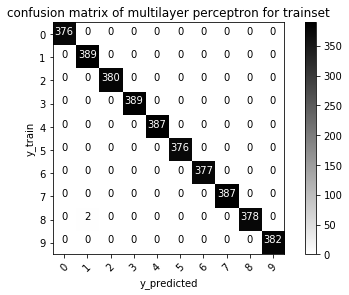


 elapse time of mlp 
 
best alpha: 5e-06
size of hideen layer: 64,  elapsed time  0.00348 s.

test set acouracy: ): 0.9572

confusion matrix of multilayer perceptron for testset
[[177   0   0   0   0   1   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   5 170   0   0   0   0   1   1   0]
 [  2   0   2 168   0   2   2   1   4   2]
 [  0   1   0   0 178   0   0   1   1   0]
 [  0   1   1   1   1 175   0   0   0   3]
 [  1   1   0   0   2   0 177   0   0   0]
 [  0   0   0   0   0   7   0 165   1   6]
 [  0  10   0   1   0   1   0   0 155   7]
 [  1   0   0   2   0   2   0   0   2 173]]


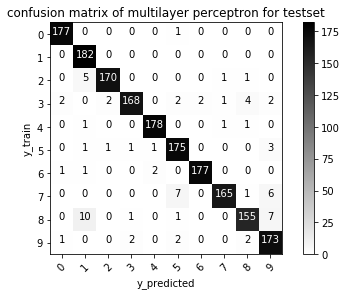

In [12]:
#implement the Multi layer perceptron with the package of sciket-learn 
#i study thre sciket learn documentaion so some of variable and also some of number is based on that.
#http://scikit-learn.org/stable
best_mlp = -1
best_acc_mlp = -1

#if Mlp takes lot of time please delete 1024, 2048 and 256,256 from the  variable of  hidden_layers,
#i write this threshod based on the sciket-learn documentation #i find 
hidden_layers = [8,16,32,64, 128, 256, 512,1024,2048,(32,32),(64,64),(128,128),(256,256)]
reguarization_str = [0.000005,0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50,500]
#empty matrix for hidden layer and regu/
best_hidden_layer = []
# we creat empty array for regualarizatio strenght
best_regularization_p = []
#for Mlp classifier function, i use the threshold of  
for i in hidden_layers:
    for reg in reguarization_str:
        mlp_classifier = MLPClassifier( alpha=reg, solver='adam',hidden_layer_sizes=i)
        mlp_classifier.fit(x_train, y_train)
        val_acc_mlp = mlp_classifier.score(x_validation, y_validation) 
        val_scores_sgd.append(sgd_score)
        if val_acc_mlp > best_acc_mlp:
            best_mlp =  mlp_classifier
            best_acc_mlp = val_acc_mlp
            best_hidden_layer = i
            best_regularization_p = reg

# find best hyper parameter based on validation accuracyh
print ("Best hidden_layer_sizes: {}, Best alpha: {}\n".format(best_hidden_layer, best_regularization_p))
print("validation accuracy: {:.4f}".format(best_mlp.score(x_validation, y_validation)))
# compute the elapsed time of the MLP in training set
print('\n########################## elapse time of MLP in training set:#########################')
start_train_mlp = time.time()
mlp_classifier = MLPClassifier(solver='adam', alpha=best_regularization_p, hidden_layer_sizes=best_hidden_layer)
mlp_classifier.fit(df_x_train, df_y_train)
finish_train_mlp = time.time()
print("hidden_layer_sizes: {}, alpha: {}, elapse time:{:.5f} s\n".format(best_hidden_layer, best_regularization_p, finish_train_mlp - start_train_mlp))


# plot train set confusion matrix
y_pred_train_mlp = mlp_classifier.predict(df_x_train)

Confusion_Matrix( confusion_matrix(df_y_train, y_pred_train_mlp), classes=class_name,title="confusion matrix of multilayer perceptron for trainset")
plt.show()

# compute elapse time of MLP for test
start_test_mlp = time.time()
print('\n elapse time of mlp \n ')
y_pred_test_mlp = mlp_classifier.predict(df_x_test)
finish_test_mlp = time.time()
print("best alpha: {}".format(best_regularization_p))
print("size of hideen layer: {},  elapsed time  {:.5f} s.\n".format(best_hidden_layer, finish_test_mlp - start_test_mlp))
# print test accuracy MLP

print("test set acouracy: ): {:.4f}\n".format( mlp_classifier.score(df_x_test, df_y_test)))

# plot test set confusion matrix
Confusion_Matrix(confusion_matrix(df_y_test, y_pred_test_mlp), classes=class_name,title="confusion matrix of multilayer perceptron for testset")
plt.show()